In [82]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def defect_detect(image):
    img =image.copy()
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV) 
    print(hsv.shape)
    h = hsv[:,:,0]
    s=hsv[:,:,1]
    v=hsv[:,:,2]
    blr= cv2.blur(v, (15,15))
    dst = cv2.fastNlMeansDenoising(blr,None, 300,7,1)
    _,binary = cv2.threshold(dst, 127, 255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    kernel =np.ones((4,4), np.uint8)
    erosion = cv2.erode(binary, kernel, iterations = 1)
    dilation =cv2.dilate(binary,kernel, iterations = 1)
    print((dilation==0).sum())
    if (dilation==0).sum() >1:
        print("defective fabric")
    
        contours,_= cv2.findContours(erosion, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        for i in contours:
            print(cv2.contourArea(i))
            if cv2.contourArea(i) < 261122.0 and cv2.contourArea(i) > 200:
                cv2.drawContours(img, i, -1, (0,255,0), 3)
    else:
        
        print("Good fabric")
    return image,hsv,v,blr,dst,binary, dilation, img
    
image_path="Fabric22.jpg"
input_image=cv2.imread(image_path)
image, hsv,v,blr,dst, binary,dilation, img =defect_detect(input_image)

(512, 512, 3)
2705
defective fabric
261121.0
613.5
3470.0


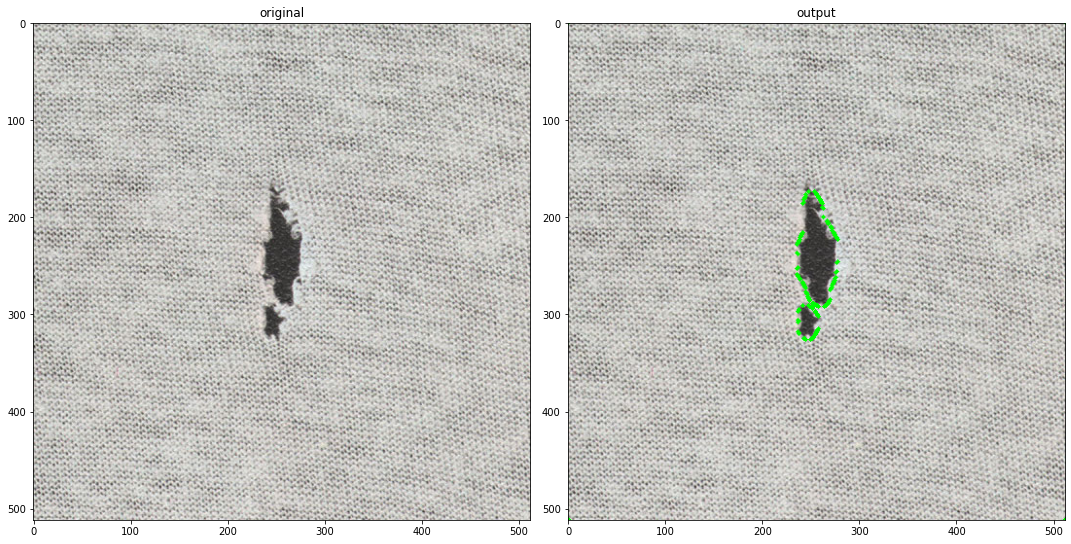

In [83]:
fig, ax = plt.subplots (1,2,figsize=(15,10))
ax[0].imshow(cv2.cvtColor (np.uint8(image), cv2.COLOR_BGR2RGB))
ax[0].set_title('original')
'''ax[0,1].imshow (cv2.cvtColor (hsv, cv2.COLOR_BGR2RGB))
ax[0,2].imshow (cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
ax[0,2].set_title('value')
ax[0,3].imshow(cv2.cvtColor(blr, cv2.COLOR_BGR2RGB))
ax[0,3].set_title('Blur')
ax[1,0].imshow (cv2.cvtColor (dst, cv2.COLOR_BGR2RGB))
ax[1,0].set_title('Filter')
ax[1,1].imshow (binary, cmap='gray')
ax[1,1].set_title('Binary')
ax[1,2].imshow(dilation, cmap='gray')
ax[0,1].set_title('HSV')
ax[1,2].set_title('Dilation')'''
ax[1].imshow(cv2.cvtColor (np.uint8(img), cv2.COLOR_BGR2RGB))
ax[1].set_title('output')
fig.tight_layout()